In [1]:
import pandas as pd
import numpy as np


# example of hyperopt-sklearn for a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe



pd.set_option('display.max_columns', None)


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
df = pd.read_csv("./CATER_MUESTRA.csv", sep=';', encoding='latin1')


# Análisis Exploratorio

In [3]:
# print the shape
print('The shape of the dataset : ', df.shape)


The shape of the dataset :  (200235, 294)


In [4]:
#pd.set_option('display.max_rows', None)
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SubGrupo,200235,2,Cuentas Claras,177573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmento_CRM,200235,13,Individuos E,48899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grupo,200235,4,Individuo,170243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan_actual,200235.0,NaN,NaN,NaN,97866.206597,854.058535,88267.0,97564.5,98212.0,98443.0,99200.0
provincia,200235,29,Buenos Aires,58510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tecnologia,200235,1,GSM,200235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan_desc,200235,1,Pospago,200235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tecno,114830,3,4G,104018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRUPO_SEG,200235,2,INDIVIDUO,193875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canal_Venta,200235,4,Venta Indirecta,151010,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

FLAG_SALE               198153
tecno                    85405
FLAG_CAMBIO              49346
FLAG_CAMBIO_IMEI         49346
FLAG_CAMBIO_EQUIPO       49346
                         ...  
cause17_count_s_avg          0
cause17_count_s_max          0
cause19_count_h3_max         0
cause19_count_h4_max         0
periodo                      0
Length: 294, dtype: int64

In [6]:


def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))



In [7]:
initial_eda(df)

Dimensions : 200235 rows, 294 columns
Total NA Values : 824384 
                           Column Name  Data Type      #Distinct  NA Values
                              SubGrupo     object            2          0
                          Segmento_CRM     object           13          0
                                 Grupo     object            4          0
                           plan_actual      int64          876          0
                             provincia     object           29          0
                            Tecnologia     object            1          0
                             plan_desc     object            1          0
                                 tecno     object            3      85405
                             GRUPO_SEG     object            2          0
                           Canal_Venta     object            4          0
                            DEBITO_AUT     object            5          0
                            id_cliente      in

In [16]:


categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)



There are 34 categorical variables

The categorical variables are :

 ['SubGrupo', 'Segmento_CRM', 'Grupo', 'provincia', 'Tecnologia', 'plan_desc', 'tecno', 'GRUPO_SEG', 'Canal_Venta', 'DEBITO_AUT', 'agrup_d_imei', 'cel_prov_ah1_fs_tem', 'cel_prov_ah1_fs_tra', 'cel_prov_ah1_s_tem', 'cel_prov_ah1_s_tra', 'cel_prov_ah2_s_tra', 'cel_prov_ah2_tra', 'cel_prov_ah3_fs_tra', 'cel_prov_ah4_fs_tem', 'cel_prov_ah4_s_tra', 'cel_prov_ah4_tra', 'marca', 'MEMORIA_INTERNA', 'NSE', 'origen_equipo', 'PORC_CAMBIO_ALCATEL_U48M', 'PORC_CAMBIO_APPLE_U48M', 'PORC_CAMBIO_MOTOROLA_U48M', 'PORC_CAMBIO_SONY_U48M', 'PORC_CATER_DPF_U48M', 'RAM', 'SISTEMA_OPERATIVO', 'so', 'TIPO_SIM']


In [31]:
df[categorical].head()

,SubGrupo,Segmento_CRM,Grupo,provincia,Tecnologia,plan_desc,tecno,GRUPO_SEG,Canal_Venta,DEBITO_AUT,...,origen_equipo,PORC_CAMBIO_ALCATEL_U48M,PORC_CAMBIO_APPLE_U48M,PORC_CAMBIO_MOTOROLA_U48M,PORC_CAMBIO_SONY_U48M,PORC_CATER_DPF_U48M,RAM,SISTEMA_OPERATIVO,so,TIPO_SIM
0,Cuentas Claras,Individuos C,Individuo,Santa Fe,GSM,Pospago,4G,INDIVIDUO,Venta Directa,NO DEBITO,...,SIN ORIGEN,.00%,100%,.00%,.00%,.00%,2 GB,IOS,IOS,NANO
1,Cuentas Claras,Individuos B,Individuo,Entre Ríos,GSM,Pospago,NaN,INDIVIDUO,Venta Directa,DEBITO TARJETA,...,SIN ORIGEN,.00%,30%,.00%,.00%,.00%,4 GB,ANDROID 1,ANDROID,NANO
2,Cuentas Claras,Individuos C,Individuo,Ciudad Autónoma De Buenos Aire,GSM,Pospago,NaN,INDIVIDUO,Venta Directa,NO DEBITO,...,SIN ORIGEN,.00%,.00%,.00%,.00%,.00%,1 GB,ANDROID 8,ANDROID,NANO
3,Pospago,Individuos Black Top,Individuo,Córdoba,GSM,Pospago,4G,INDIVIDUO,Venta Indirecta,NO DEBITO,...,SIN ORIGEN,.00%,.00%,.00%,.00%,.00%,3 GB,ANDROID 8,ANDROID,NANO
4,Cuentas Claras,Individuos B,Individuo,Salta,GSM,Pospago,3G,INDIVIDUO,Venta Directa,DEBITO TARJETA,...,SIN ORIGEN,.00%,.00%,.00%,.00%,.00%,1 GB,ANDROID 5,ANDROID,OTRO


In [32]:
for var in categorical: 
    
    print(df[var].value_counts())

Cuentas Claras    177573
Pospago            22662
Name: SubGrupo, dtype: int64
Individuos E            48899
Individuos C            47036
Individuos B            38557
Sin Segmento Otro       20954
Individuos A            11565
Individuos Black Top    10667
Individuos D             9657
Individuos Black         3862
Sin Segmento CUIT        2678
Soho A                   2555
Soho B                   1883
Soho C                   1620
Black - Soho A            302
Name: Segmento_CRM, dtype: int64
Individuo            170243
Sin Segmento Otro     20954
Corporativo            6360
Sin Segmento CUIT      2678
Name: Grupo, dtype: int64
Buenos Aires                      58510
Ciudad Autónoma De Buenos Aire    29244
Córdoba                           21814
Santa Fe                          21688
Tucumán                           10384
Salta                              8051
Entre Ríos                         7446
Chaco                              6942
Misiones                           6467


TELECOM       119056
MOVISTAR       36771
CLARO          31164
SIN ORIGEN     11757
NEXTEL          1093
OTRO             394
Name: origen_equipo, dtype: int64
.00%    190123
33%       1005
50%        969
25%        898
20%        762
         ...  
86%          1
5.5%         1
85%          1
.59%         1
.49%         1
Name: PORC_CAMBIO_ALCATEL_U48M, Length: 164, dtype: int64
.00%    183778
100%      6048
50%       2146
33%       1269
25%        896
         ...  
.79%         1
87%          1
7.5%         1
7.0%         1
7.9%         1
Name: PORC_CAMBIO_APPLE_U48M, Length: 164, dtype: int64
.00%    139092
100%     12424
50%       8856
33%       6011
25%       4280
         ...  
9.2%         1
.70%         1
.59%         1
.54%         1
.82%         1
Name: PORC_CAMBIO_MOTOROLA_U48M, Length: 213, dtype: int64
.00%    195730
50%        493
33%        461
25%        413
20%        382
         ...  
99%          1
.57%         1
1.0%         1
.24%         1
.94%         1
Name: P

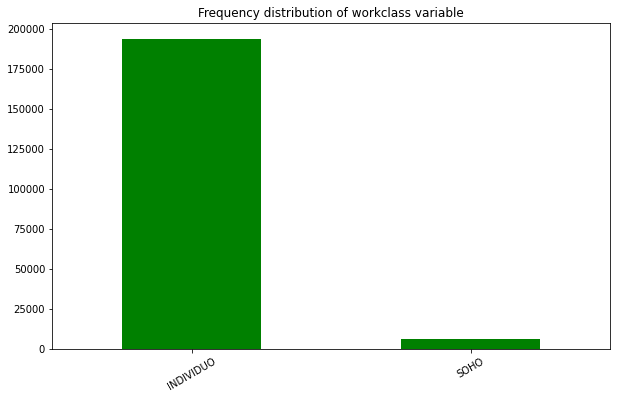

In [37]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 6))
ax = df.GRUPO_SEG.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.GRUPO_SEG.value_counts().index, rotation=30)
plt.show()



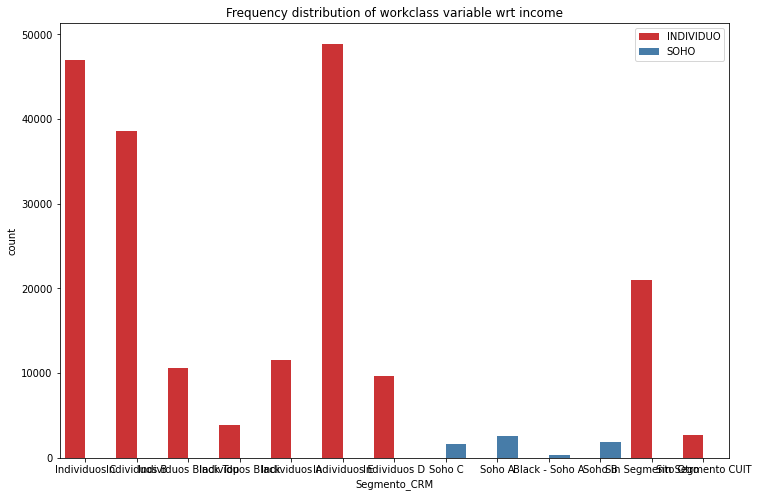

In [42]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="Segmento_CRM", hue="GRUPO_SEG", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

In [8]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 260 numerical variables

The numerical variables are :

 ['plan_actual', 'id_cliente', 'antiguedad_agrup', 'Antiguedad_Key', 'AVG_CANT_D_RES', 'AVG_CANT_D_RES_2M', 'AVG_CANT_D_RES_4MU', 'AVG_CANT_D_RES_6M', 'Avg_Days_imei', 'avg_dias_pago_u4m', 'BATERIA', 'c_q_ib_m2', 'c_SUSP_MOR1_2m', 'c_SUSP_MOR2_6m', 'c_SUSP_MOR2_avgu6m', 'cant_alcance_3m', 'cant_alcance_5m', 'cant_alcance_6m', 'CANT_C_CERR_6MU', 'CANT_C_G0', 'CANT_C_G0_2MU_coc', 'CANT_C_G11_5MU', 'CANT_C_G12_3MU', 'CANT_C_G13_2MU_coc', 'CANT_C_G13_4MU', 'CANT_C_G13_6MU', 'CANT_C_G14_2MU', 'CANT_C_G14_4MU', 'CANT_C_G14_6MU', 'CANT_C_G15_4M', 'CANT_C_G16_4MU', 'CANT_C_G16_5M', 'CANT_C_G17_5MU', 'CANT_C_G18_6MU', 'CANT_C_G2_2M', 'CANT_C_G20_2MU', 'CANT_C_G21_5MU_coc', 'CANT_C_G4_2MU_coc', 'CANT_C_G4_5MU_coc', 'CANT_C_G5_3M', 'CANT_C_G5_6MU_coc', 'CANT_C_G6_5MU', 'CANT_C_G7', 'CANT_C_M1_5MU_coc', 'CANT_C_M1_6M', 'CANT_C_M10', 'CANT_C_M10_6MU', 'CANT_C_M12_6MU_coc', 'CANT_C_M13_5MU', 'CANT_C_M15_4MU', 'CANT_C_M16_2MU_coc', 'CA

/home/juan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


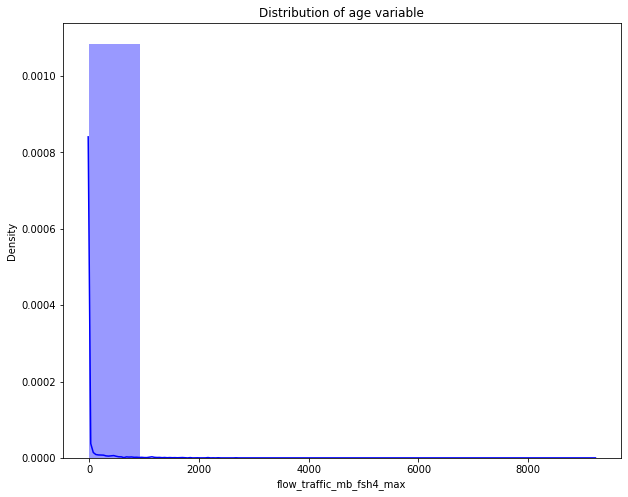

In [44]:
f, ax = plt.subplots(figsize=(10,8))
x = df['flow_traffic_mb_fsh4_max']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

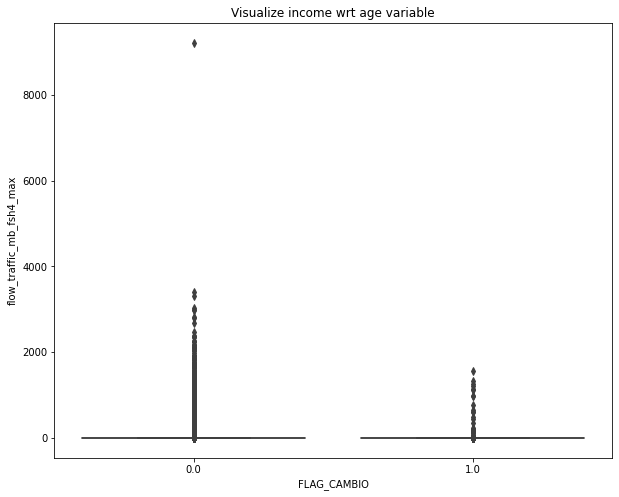

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="FLAG_CAMBIO", y="flow_traffic_mb_fsh4_max", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

solamente voy a utilizar las variables numericas

In [97]:
df_numerico = df[numerical]

In [98]:
df_numerico.columns

Index(['plan_actual', 'id_cliente', 'antiguedad_agrup', 'Antiguedad_Key',
       'AVG_CANT_D_RES', 'AVG_CANT_D_RES_2M', 'AVG_CANT_D_RES_4MU',
       'AVG_CANT_D_RES_6M', 'Avg_Days_imei', 'avg_dias_pago_u4m',
       ...
       'wsapp_time_h1_std', 'wsapp_time_h2_avg', 'wsapp_time_h4_max',
       'wsapp_traffic_mb_sh4_max', 'FLAG_CAMBIO_EQUIPO', 'FLAG_CAMBIO_IMEI',
       'FLAG_CAMBIO', 'FLAG_SALE', 'target', 'periodo'],
      dtype='object', length=260)

In [99]:
#X = df.drop("target",axis=1)   #Feature Matrix


#vuelo todas las que tienen algun missing#
df_numerico=df_numerico.dropna(axis=1)



#X = df_numerico[['AVG_CANT_D_RES','wsapp_time_h4_max','Avg_Days_imei','wsapp_time_h1_std', 'wsapp_time_h2_avg', 'wsapp_time_h4_max']]
X = df_numerico.drop(['id_cliente', 'target','periodo'], axis = 1)
y = df_numerico["target"]          #Target Variable




In [100]:
X.head()

,plan_actual,antiguedad_agrup,Antiguedad_Key,AVG_CANT_D_RES,AVG_CANT_D_RES_2M,AVG_CANT_D_RES_4MU,AVG_CANT_D_RES_6M,Avg_Days_imei,avg_dias_pago_u4m,BATERIA,c_q_ib_m2,c_SUSP_MOR1_2m,c_SUSP_MOR2_6m,c_SUSP_MOR2_avgu6m,cant_alcance_3m,cant_alcance_5m,cant_alcance_6m,CANT_C_CERR_6MU,CANT_C_G0,CANT_C_G0_2MU_coc,CANT_C_G11_5MU,CANT_C_G12_3MU,CANT_C_G13_2MU_coc,CANT_C_G13_4MU,CANT_C_G13_6MU,CANT_C_G14_2MU,CANT_C_G14_4MU,CANT_C_G14_6MU,CANT_C_G15_4M,CANT_C_G16_4MU,CANT_C_G16_5M,CANT_C_G17_5MU,CANT_C_G18_6MU,CANT_C_G2_2M,CANT_C_G20_2MU,CANT_C_G21_5MU_coc,CANT_C_G4_2MU_coc,CANT_C_G4_5MU_coc,CANT_C_G5_3M,CANT_C_G5_6MU_coc,CANT_C_G6_5MU,CANT_C_G7,CANT_C_M1_5MU_coc,CANT_C_M1_6M,CANT_C_M10,CANT_C_M10_6MU,CANT_C_M12_6MU_coc,CANT_C_M13_5MU,CANT_C_M15_4MU,CANT_C_M16_2MU_coc,CANT_C_M4_4MU_coc,CANT_C_M4_5MU,CANT_C_M4_6MU,CANT_C_M6_4MU,CANT_C_M7,CANT_C_M7_4MU_coc,CANT_C_M8,CANT_C_M8_6MU,CANT_C_RES_0D_2M,CANT_C_RES_1D_6MU_coc,CANT_C_RES_2D_2MU,CANT_C_T6_2MU,CANT_C_T6_3MU_coc,CANT_C_T7,CANT_C_T7_5MU,CANT_C_T9_3MU,CANT_CAMPANIAS_UP,cant_canjes_u6m,CANT_CASOS_3M,CANT_CASOS_4M,CANT_CASOS_4MU,CANT_CASOS_6MU,cant_dias,cant_dias_autogestion,cant_down_2m,cant_ingresos_autogestion,cant_sist_operativos,cant_up_1m,CANT_VENTAS_U48M,cause16_count_h1_max,cause16_count_h4_max,cause16_count_sh1_max,cause16_count_sh4_max,cause17_count_fs_max,cause17_count_fsh1_avg,cause17_count_fsh1_min,cause17_count_fsh2_min,cause17_count_fsh4_avg,cause17_count_fsh4_min,cause17_count_h3_min,cause17_count_s_avg,cause17_count_s_max,cause19_count_h3_max,cause19_count_h4_max,Ciclos_Restantes,COC_cant_alcance_5m,coc_mb_Roam_m2,coc_mb_Tot_m2,coc_Q_Reset_t_m3,coc_Rev_M1,coc_Rev_M5,coc_sum_cnt_stp_m2,coc_sum_min_stp_m2,days_time_ah1_temprev,dif_sum_min_m2,dif_sum_min_sm_m2,downlink_mb_h2_std,downlink_mb_s_avg,downlink_mb_sh1_max,Estado_Laboral_Key,events_count_h1_max,events_count_h4_std,events_d_sh3_avg_e,events_duration_fsh1_max,events_duration_fsh3_min,events_duration_s_min,events_duration_sh3_avg,fact_imp_m2_e,fact_imp_m6_e,fact_otro_m3_e,fact_otro_m6_e,fact_tot_m1_e,fact_tot_m6_e,fact_trair_m2_e,flow_traffic_mb_fsh4_max,flow_traffic_mb_sh1_avg,freq_prev_ah2_s_tem,inactive_duration_share_fs_min,inactive_duration_share_fsh2_avg,inactive_duration_share_h1_min,inactive_duration_share_h4_std,inactive_duration_share_sh2_avg,inactive_duration_share_sh2_std,inactive_duration_share_sh3_min,inactive_duration_share_sh3_std,inactive_duration_share_sh4_avg,inactive_events_fs_min,inactive_events_fs_std,inactive_events_fsh1_std,inactive_events_fsh2_avg,inactive_events_fsh3_std,inactive_events_h2_std,inactive_events_s_max,inactive_events_sh2_max,inactive_events_sh3_min,inactive_hours_fs_std,inactive_hours_s_max,inactive_hours_s_std,inactive_hours_sh2_std,inactive_hours_sh4_std,inactive_hours_t_min,max_dias_pago_u1m,mbps_fs_avg,mbps_fs_max,mbps_fsh1_max,mbps_fsh3_avg,mbps_h1_avg,mbps_h3_max,mbps_t_avg,mbytes_4g_m2,mbytes_4g_m4,mbytes_4g_m5,mbytes_Roam_m5,mbytes_Roam_m6,min_dias_lanzamiento_compra_U48M,min_dias_pago_u4m,minutes_ah1_s_tem,minutes_ah1_temprev,minutes_ah3_trafprev,missing_hours_sh2_std,missing_hours_t_avg,MORA_1_M3,MORA_1_M6,MORA_2_M1,MORA_2_U5M,motion_events_fs_min,motion_events_fsh2_max,motion_events_fsh3_std,motion_events_h3_std,motion_events_s_std,motion_events_sh3_avg,MP_CAMARA_PRINCIPAL,nodataload_duration_share_fsh3_s,nodataload_duration_share_h2_min,nodataload_duration_share_h3_avg,nodataload_events_sh3_std,nodataload_hours_fsh2_std,nodataload_hours_sh2_max,PESO,porc_disp_desktop,porc_disp_mobile,rank_minutes_fs_ah1_fs_tra,rank_minutes_fs_ah4_s_tem,rank_minutes_s_ah1_s_tra,rank_minutes_s_ah3_fs_tra,rank_minutes_s_ah4_fs_tem,rank_traffic_fs_ah4_fs_tem,Rev_M1_e,Rev_M5_e,Saldo_Puntos,share_minutes_ah1_s_tra,share_minutes_ah2_fs_tem,share_minutes_ah3_fs_tra,share_minutes_ah3_s_tra,share_minutes_ah3_trafprev,share_prev_ah2_fs_tem,share_prev_ah3_s_tem,share_prev_ah3_temprev,share_prev_ah4_s_tra,share_time_ah1_fs_tem,share_time_ah4_fs_tem,share_time_ah4_s_tra,share_time_ah4_trafprev,share

In [101]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [102]:
#define dataset
#X, y = make_classification(n_samples=100, n_features=6, n_informative=2, n_redundant=1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [103]:
X_train.shape

(134157, 253)

In [104]:
X_train.columns

Index(['plan_actual', 'antiguedad_agrup', 'Antiguedad_Key', 'AVG_CANT_D_RES',
       'AVG_CANT_D_RES_2M', 'AVG_CANT_D_RES_4MU', 'AVG_CANT_D_RES_6M',
       'Avg_Days_imei', 'avg_dias_pago_u4m', 'BATERIA',
       ...
       'traffic_3g_mb_h3_avg', 'uplink_mb_s_min', 'uplink_mb_sh4_avg_e',
       'uplink_mb_sh4_max', 'wsapp_time_fsh3_std', 'wsapp_time_fsh4_std',
       'wsapp_time_h1_std', 'wsapp_time_h2_avg', 'wsapp_time_h4_max',
       'wsapp_traffic_mb_sh4_max'],
      dtype='object', length=253)

In [105]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [106]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9513756469626805


In [107]:
df_numerico.columns

Index(['plan_actual', 'id_cliente', 'antiguedad_agrup', 'Antiguedad_Key',
       'AVG_CANT_D_RES', 'AVG_CANT_D_RES_2M', 'AVG_CANT_D_RES_4MU',
       'AVG_CANT_D_RES_6M', 'Avg_Days_imei', 'avg_dias_pago_u4m',
       ...
       'uplink_mb_sh4_avg_e', 'uplink_mb_sh4_max', 'wsapp_time_fsh3_std',
       'wsapp_time_fsh4_std', 'wsapp_time_h1_std', 'wsapp_time_h2_avg',
       'wsapp_time_h4_max', 'wsapp_traffic_mb_sh4_max', 'target', 'periodo'],
      dtype='object', length=256)

Text(0.5, 0, 'Relative Importance')

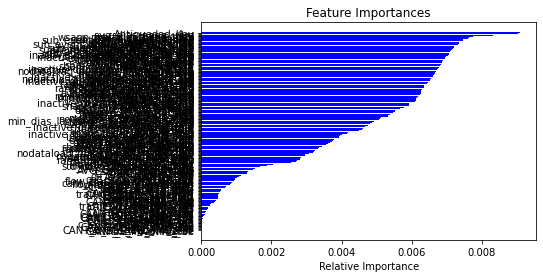

In [108]:
features=X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [109]:
#!pip install category_encoders

# import category encoders

import category_encoders as ce

#https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance

# encode categorical variables with one-hot encoding

#encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
#                                 'race', 'sex', 'native_country'])

#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)

# REDES NEURONALES

In [110]:
# convert all columns of DataFrame
df_numerico_redes = df_numerico.astype(np.float64)

In [111]:
df_numerico_redes.head()

,plan_actual,id_cliente,antiguedad_agrup,Antiguedad_Key,AVG_CANT_D_RES,AVG_CANT_D_RES_2M,AVG_CANT_D_RES_4MU,AVG_CANT_D_RES_6M,Avg_Days_imei,avg_dias_pago_u4m,BATERIA,c_q_ib_m2,c_SUSP_MOR1_2m,c_SUSP_MOR2_6m,c_SUSP_MOR2_avgu6m,cant_alcance_3m,cant_alcance_5m,cant_alcance_6m,CANT_C_CERR_6MU,CANT_C_G0,CANT_C_G0_2MU_coc,CANT_C_G11_5MU,CANT_C_G12_3MU,CANT_C_G13_2MU_coc,CANT_C_G13_4MU,CANT_C_G13_6MU,CANT_C_G14_2MU,CANT_C_G14_4MU,CANT_C_G14_6MU,CANT_C_G15_4M,CANT_C_G16_4MU,CANT_C_G16_5M,CANT_C_G17_5MU,CANT_C_G18_6MU,CANT_C_G2_2M,CANT_C_G20_2MU,CANT_C_G21_5MU_coc,CANT_C_G4_2MU_coc,CANT_C_G4_5MU_coc,CANT_C_G5_3M,CANT_C_G5_6MU_coc,CANT_C_G6_5MU,CANT_C_G7,CANT_C_M1_5MU_coc,CANT_C_M1_6M,CANT_C_M10,CANT_C_M10_6MU,CANT_C_M12_6MU_coc,CANT_C_M13_5MU,CANT_C_M15_4MU,CANT_C_M16_2MU_coc,CANT_C_M4_4MU_coc,CANT_C_M4_5MU,CANT_C_M4_6MU,CANT_C_M6_4MU,CANT_C_M7,CANT_C_M7_4MU_coc,CANT_C_M8,CANT_C_M8_6MU,CANT_C_RES_0D_2M,CANT_C_RES_1D_6MU_coc,CANT_C_RES_2D_2MU,CANT_C_T6_2MU,CANT_C_T6_3MU_coc,CANT_C_T7,CANT_C_T7_5MU,CANT_C_T9_3MU,CANT_CAMPANIAS_UP,cant_canjes_u6m,CANT_CASOS_3M,CANT_CASOS_4M,CANT_CASOS_4MU,CANT_CASOS_6MU,cant_dias,cant_dias_autogestion,cant_down_2m,cant_ingresos_autogestion,cant_sist_operativos,cant_up_1m,CANT_VENTAS_U48M,cause16_count_h1_max,cause16_count_h4_max,cause16_count_sh1_max,cause16_count_sh4_max,cause17_count_fs_max,cause17_count_fsh1_avg,cause17_count_fsh1_min,cause17_count_fsh2_min,cause17_count_fsh4_avg,cause17_count_fsh4_min,cause17_count_h3_min,cause17_count_s_avg,cause17_count_s_max,cause19_count_h3_max,cause19_count_h4_max,Ciclos_Restantes,COC_cant_alcance_5m,coc_mb_Roam_m2,coc_mb_Tot_m2,coc_Q_Reset_t_m3,coc_Rev_M1,coc_Rev_M5,coc_sum_cnt_stp_m2,coc_sum_min_stp_m2,days_time_ah1_temprev,dif_sum_min_m2,dif_sum_min_sm_m2,downlink_mb_h2_std,downlink_mb_s_avg,downlink_mb_sh1_max,Estado_Laboral_Key,events_count_h1_max,events_count_h4_std,events_d_sh3_avg_e,events_duration_fsh1_max,events_duration_fsh3_min,events_duration_s_min,events_duration_sh3_avg,fact_imp_m2_e,fact_imp_m6_e,fact_otro_m3_e,fact_otro_m6_e,fact_tot_m1_e,fact_tot_m6_e,fact_trair_m2_e,flow_traffic_mb_fsh4_max,flow_traffic_mb_sh1_avg,freq_prev_ah2_s_tem,inactive_duration_share_fs_min,inactive_duration_share_fsh2_avg,inactive_duration_share_h1_min,inactive_duration_share_h4_std,inactive_duration_share_sh2_avg,inactive_duration_share_sh2_std,inactive_duration_share_sh3_min,inactive_duration_share_sh3_std,inactive_duration_share_sh4_avg,inactive_events_fs_min,inactive_events_fs_std,inactive_events_fsh1_std,inactive_events_fsh2_avg,inactive_events_fsh3_std,inactive_events_h2_std,inactive_events_s_max,inactive_events_sh2_max,inactive_events_sh3_min,inactive_hours_fs_std,inactive_hours_s_max,inactive_hours_s_std,inactive_hours_sh2_std,inactive_hours_sh4_std,inactive_hours_t_min,max_dias_pago_u1m,mbps_fs_avg,mbps_fs_max,mbps_fsh1_max,mbps_fsh3_avg,mbps_h1_avg,mbps_h3_max,mbps_t_avg,mbytes_4g_m2,mbytes_4g_m4,mbytes_4g_m5,mbytes_Roam_m5,mbytes_Roam_m6,min_dias_lanzamiento_compra_U48M,min_dias_pago_u4m,minutes_ah1_s_tem,minutes_ah1_temprev,minutes_ah3_trafprev,missing_hours_sh2_std,missing_hours_t_avg,MORA_1_M3,MORA_1_M6,MORA_2_M1,MORA_2_U5M,motion_events_fs_min,motion_events_fsh2_max,motion_events_fsh3_std,motion_events_h3_std,motion_events_s_std,motion_events_sh3_avg,MP_CAMARA_PRINCIPAL,nodataload_duration_share_fsh3_s,nodataload_duration_share_h2_min,nodataload_duration_share_h3_avg,nodataload_events_sh3_std,nodataload_hours_fsh2_std,nodataload_hours_sh2_max,PESO,porc_disp_desktop,porc_disp_mobile,rank_minutes_fs_ah1_fs_tra,rank_minutes_fs_ah4_s_tem,rank_minutes_s_ah1_s_tra,rank_minutes_s_ah3_fs_tra,rank_minutes_s_ah4_fs_tem,rank_traffic_fs_ah4_fs_tem,Rev_M1_e,Rev_M5_e,Saldo_Puntos,share_minutes_ah1_s_tra,share_minutes_ah2_fs_tem,share_minutes_ah3_fs_tra,share_minutes_ah3_s_tra,share_minutes_ah3_trafprev,share_prev_ah2_fs_tem,share_prev_ah3_s_tem,share_prev_ah3_temprev,share_prev_ah4_s_tra,share_time_ah1_fs_tem,share_time_ah4_fs_tem,share_time_ah4_s_tra,share_time_ah4_tra

In [112]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras import models, layers  
from keras_visualizer import visualizer  

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
print(model.summary())

#Visualizar el modelo
visualizer(model, format='png', view=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                3048      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
#model compile
model.compile(loss = 'binary_crossentropy',
             optimizer ='adam',metrics=['accuracy'])


#model fit
model.fit(X_train,y_train,validation_split=0.33,batch_size=256, epochs=10, verbose=1)

       

Epoch 1/10
352/352 [==============================] - 1s 2ms/step - loss: 673.7386 - accuracy: 0.7619 - val_loss: 1.1233 - val_accuracy: 0.9464
Epoch 2/10
352/352 [==============================] - 1s 2ms/step - loss: 1.1757 - accuracy: 0.9454 - val_loss: 0.6157 - val_accuracy: 0.9504
Epoch 3/10
352/352 [==============================] - 1s 2ms/step - loss: 0.6027 - accuracy: 0.9480 - val_loss: 0.4300 - val_accuracy: 0.9510
Epoch 4/10
352/352 [==============================] - 1s 2ms/step - loss: 0.4637 - accuracy: 0.9483 - val_loss: 0.3856 - val_accuracy: 0.9513
Epoch 5/10
352/352 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.9489 - val_loss: 0.3243 - val_accuracy: 0.9515
Epoch 6/10
352/352 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.9489 - val_loss: 0.2846 - val_accuracy: 0.9516
Epoch 7/10
352/352 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.9490 - val_loss: 0.2594 - val_accuracy: 0.9516
Epoc

In [ ]:
#https://www.datacamp.com/community/tutorials/deep-learning-python

In [115]:
y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     62866
           1       0.00      0.00      0.00      3212

    accuracy                           0.95     66078
   macro avg       0.48      0.50      0.49     66078
weighted avg       0.91      0.95      0.93     66078



In [119]:




import imblearn